## Introduction


In this Jupyter notebook, I analyzed the Advertising dataset, which can be found here(https://www.kaggle.com/datasets/bumba5341/advertisingcsv). This notebook demonstrates a typical sales prediction analysis using Python. It includes:

Importing Libraries: Importing necessary libraries such as NumPy, pandas, scikit-learn, and matplotlib.

Regression Analysis: Performing regression to identify key variables influencing sales.

Data Visualization: Utilizing visual tools like pair plots and heatmaps to present the data.

Conclusion: Summarizing findings and providing references.

## 📦Import

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")


print("numpy:",np.__version__)
print("pandas:",pd.__version__)
print('matplotlib: {}'.format(matplotlib.__version__))
print("sckit-learn",sklearn.__version__)

numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
sckit-learn 1.4.2


## 💾Dataset

In [11]:
df = pd.read_csv("data/Advertising.csv")
df.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [12]:
df = df.drop(columns="Unnamed: 0", axis=1)
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
# Check for missing values in the dataset

df.isnull().values.any()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [29]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 📈Regression

Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them. -corporatefinanceinstitute

In [53]:
new_data = [150]

new_data = pd.DataFrame(new_data,columns=['TV'])


reg_model.predict(new_data)

array([[14.16308961]])

In [54]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

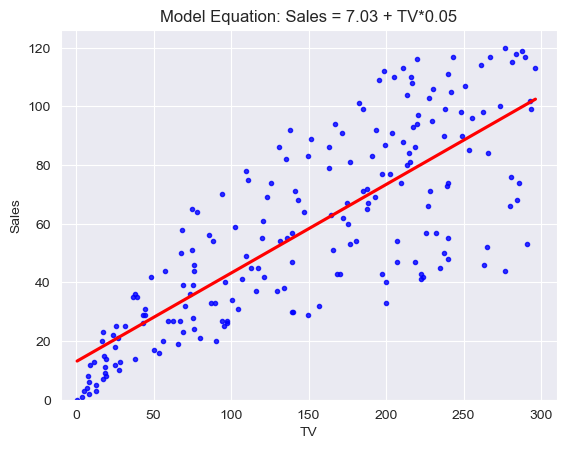

In [55]:
# Visualization of the Model
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [48]:
le = LabelEncoder()
y= le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [50]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression:

Linear regression (in scikit-learn) is the most basic form, where the model is not penalized for its choice of weights, at all. That means, during the training stage, if the model feels like one particular feature is particularly important, the model may place a large weight to the feature. This sometimes leads to overfitting in small datasets. Hence, following methods are invented.

# Ridge regression:

Ridge regression is a statistical regularization technique. It corrects for overfitting on training data in machine learning models.

# Lasso regression
Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros.

In [51]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 379.797134709863
R2 Score: 0.6990865689550048
Cross-Validation R2: 0.5564500526580527


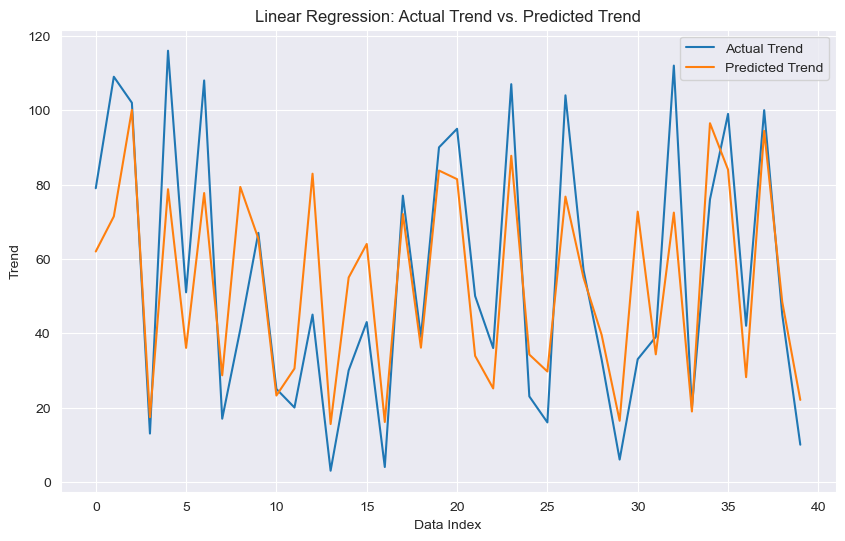


Ridge Regression
Mean Squared Error: 395.6837653514585
R2 Score: 0.6864995847541919
Cross-Validation R2: 0.5479953586442761


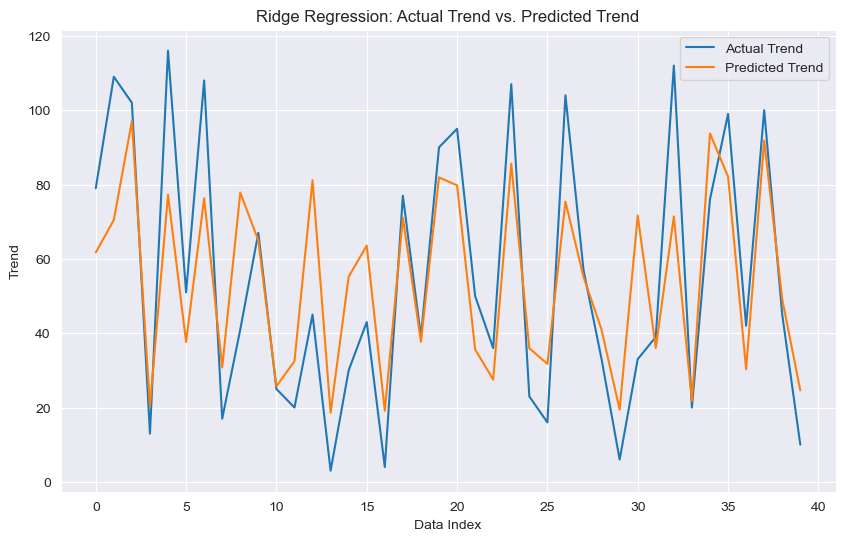


Lasso Regression
Mean Squared Error: 418.53691124253766
R2 Score: 0.6683930275641019
Cross-Validation R2: 0.5364666507809093


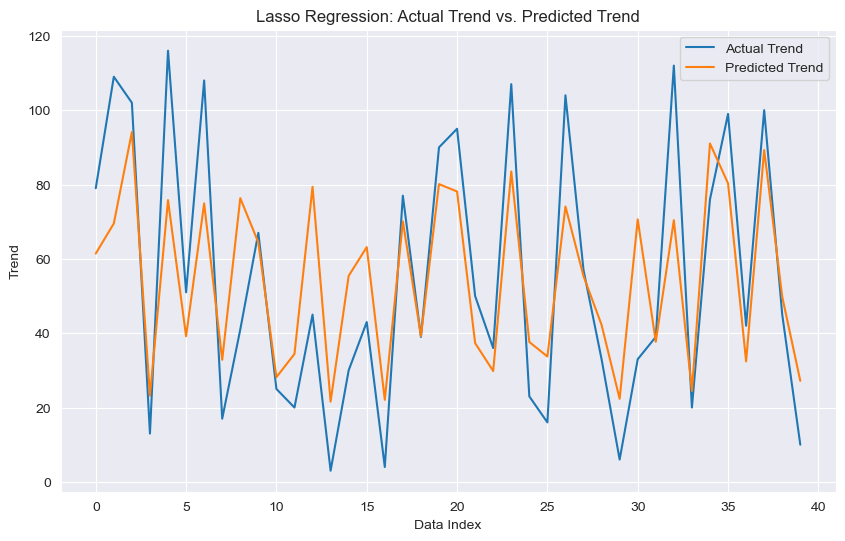

In [52]:
for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()    

## 📊Visualization

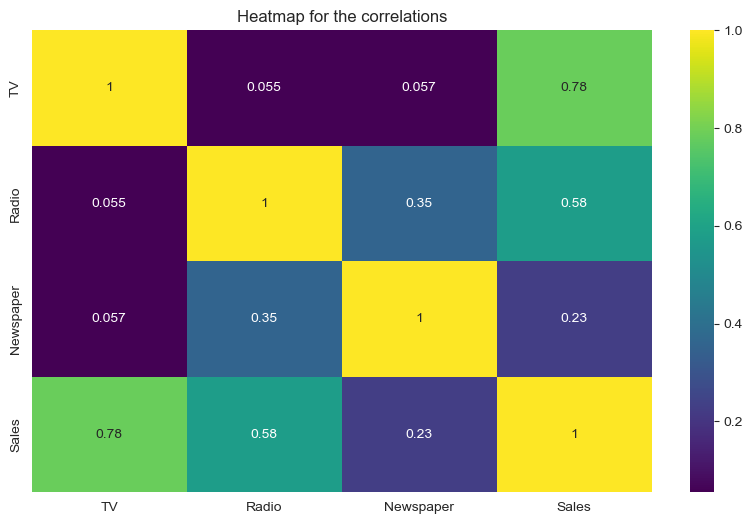

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

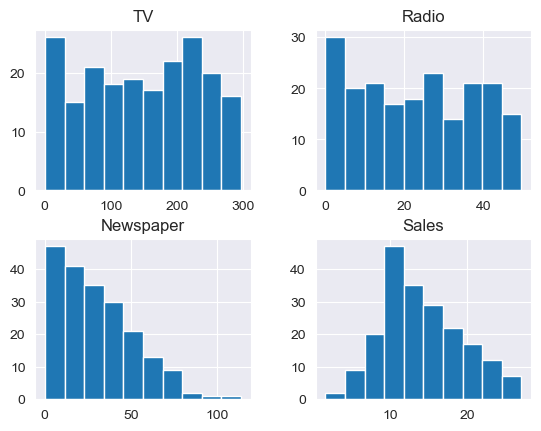

In [27]:
df.hist()
plt.show()

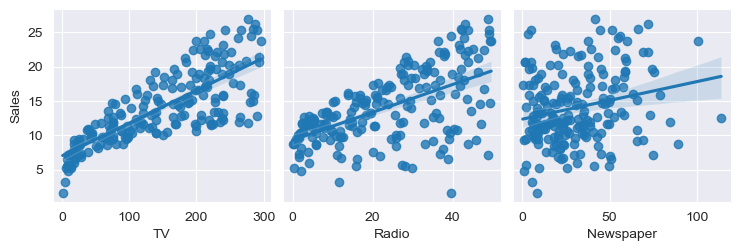

In [31]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
plt.show()

## Conclusion

In this notebook I analyzed advertising csv with numpy, pandas, sckit-learn, matplotlib libraries and python as a coding language. I try to visualize 
sales data with different techniques such as pairplot or heatmap.  References, sample notebooks, and ChatGPT were consulted for this work. Thank you for reading.

data source:

https://www.kaggle.com/datasets/bumba5341/advertisingcsv


References:

https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

https://www.ibm.com/topics/ridge-regression

https://en.wikipedia.org/wiki/Regression_analysisi

https://www.scribbr.com/statistics/multiple-linear-regression/#:~:text=What%20is%20multiple%20linear%20regression,variables%20using%20a%20straight%20line

https://medium.com/deep-learning-turkiye/model-performans%C4%B1n%C4%B1-de%C4%9Ferlendirmek-metrikler-cb6568705b1